# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | prince rupert
Processing Record 2 of Set 1 | ataq
Processing Record 3 of Set 1 | arteche
Processing Record 4 of Set 1 | rocha
Processing Record 5 of Set 1 | bikenibeu village
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | tsiombe
Processing Record 10 of Set 1 | fuling
Processing Record 11 of Set 1 | pontian kechil
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | daru
Processing Record 17 of Set 1 | dzuunharaa
Processing Record 18 of Set 1 | fort bragg
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | santa elena de uairen
Proc

Processing Record 39 of Set 4 | ketchikan
Processing Record 40 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 4 | gizo
Processing Record 42 of Set 4 | skowhegan
Processing Record 43 of Set 4 | thinadhoo
Processing Record 44 of Set 4 | dalbandin
Processing Record 45 of Set 4 | isafjordur
Processing Record 46 of Set 4 | constantia
Processing Record 47 of Set 4 | kuching
Processing Record 48 of Set 4 | fraserburgh
Processing Record 49 of Set 4 | erechim
Processing Record 0 of Set 5 | hakha
Processing Record 1 of Set 5 | saudarkrokur
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | ishimbay
Processing Record 4 of Set 5 | ubinskoye
Processing Record 5 of Set 5 | thunder bay
Processing Record 6 of Set 5 | nikolayevsk-on-amure
Processing Record 7 of Set 5 | zaozersk
Processing Record 8 of Set 5 | wailua homesteads
Processing Record 9 of Set 5 | copala
Processing Record 10 of Set 5 | la passe
Processing Record 11 of Set 5 | kras

City not found. Skipping...
Processing Record 29 of Set 8 | tanrake village
City not found. Skipping...
Processing Record 30 of Set 8 | zhangye
Processing Record 31 of Set 8 | mahajanga
Processing Record 32 of Set 8 | makokou
Processing Record 33 of Set 8 | fort mcmurray
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | nemuro
Processing Record 36 of Set 8 | monrovia
Processing Record 37 of Set 8 | rio de janeiro
Processing Record 38 of Set 8 | candelaria
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | baotou
Processing Record 41 of Set 8 | abraham's bay
City not found. Skipping...
Processing Record 42 of Set 8 | north bend
Processing Record 43 of Set 8 | ninotsminda
Processing Record 44 of Set 8 | rio grande
Processing Record 45 of Set 8 | citra
Processing Record 46 of Set 8 | el calafate
Processing Record 47 of Set 8 | villa berthet
Processing Record 48 of Set 8 | bhachau
Processing Record 49 of Set 8 | newman
Processing Record 0 

Processing Record 15 of Set 12 | forde
Processing Record 16 of Set 12 | obihiro
Processing Record 17 of Set 12 | flin flon
Processing Record 18 of Set 12 | balqash
Processing Record 19 of Set 12 | zykovo
Processing Record 20 of Set 12 | khorugh
Processing Record 21 of Set 12 | dayapar
City not found. Skipping...
Processing Record 22 of Set 12 | saint-philippe
Processing Record 23 of Set 12 | mweka
Processing Record 24 of Set 12 | itamaraca
Processing Record 25 of Set 12 | lebanon
Processing Record 26 of Set 12 | burang
Processing Record 27 of Set 12 | litayan
Processing Record 28 of Set 12 | san francisco telixtlahuaca
Processing Record 29 of Set 12 | borzya
Processing Record 30 of Set 12 | kanash
Processing Record 31 of Set 12 | lazaro cardenas
Processing Record 32 of Set 12 | noumea
Processing Record 33 of Set 12 | carbonear
Processing Record 34 of Set 12 | charlotte amalie
Processing Record 35 of Set 12 | namtsy
Processing Record 36 of Set 12 | camiri
Processing Record 37 of Set 12 

In [4]:
city_data

[{'City': 'prince rupert',
  'Lat': 54.3161,
  'Lng': -130.3201,
  'Max Temp': 12.05,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 4.12,
  'Country': 'CA',
  'Date': 1693947619},
 {'City': 'ataq',
  'Lat': 14.5377,
  'Lng': 46.8319,
  'Max Temp': 29.02,
  'Humidity': 43,
  'Cloudiness': 91,
  'Wind Speed': 2.39,
  'Country': 'YE',
  'Date': 1693947853},
 {'City': 'arteche',
  'Lat': 12.2645,
  'Lng': 125.4048,
  'Max Temp': 25.37,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 1.39,
  'Country': 'PH',
  'Date': 1693947853},
 {'City': 'rocha',
  'Lat': -34.4833,
  'Lng': -54.3333,
  'Max Temp': 7.31,
  'Humidity': 69,
  'Cloudiness': 23,
  'Wind Speed': 3.72,
  'Country': 'UY',
  'Date': 1693947853},
 {'City': 'bikenibeu village',
  'Lat': 1.3673,
  'Lng': 173.1241,
  'Max Temp': 30.98,
  'Humidity': 70,
  'Cloudiness': 20,
  'Wind Speed': 4.12,
  'Country': 'KI',
  'Date': 1693947853},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 3.5

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,prince rupert,54.3161,-130.3201,12.05,98,100,4.12,CA,1693947619
1,ataq,14.5377,46.8319,29.02,43,91,2.39,YE,1693947853
2,arteche,12.2645,125.4048,25.37,88,100,1.39,PH,1693947853
3,rocha,-34.4833,-54.3333,7.31,69,23,3.72,UY,1693947853
4,bikenibeu village,1.3673,173.1241,30.98,70,20,4.12,KI,1693947853


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,prince rupert,54.3161,-130.3201,12.05,98,100,4.12,CA,1693947619
1,ataq,14.5377,46.8319,29.02,43,91,2.39,YE,1693947853
2,arteche,12.2645,125.4048,25.37,88,100,1.39,PH,1693947853
3,rocha,-34.4833,-54.3333,7.31,69,23,3.72,UY,1693947853
4,bikenibeu village,1.3673,173.1241,30.98,70,20,4.12,KI,1693947853


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

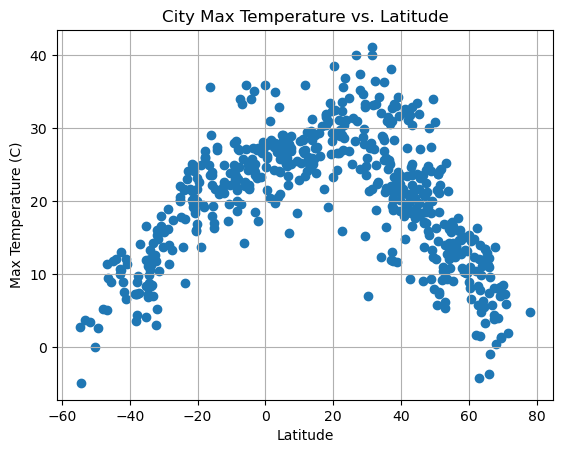

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

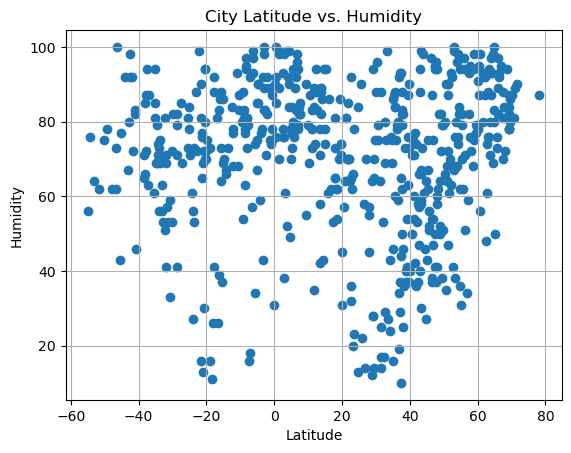

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

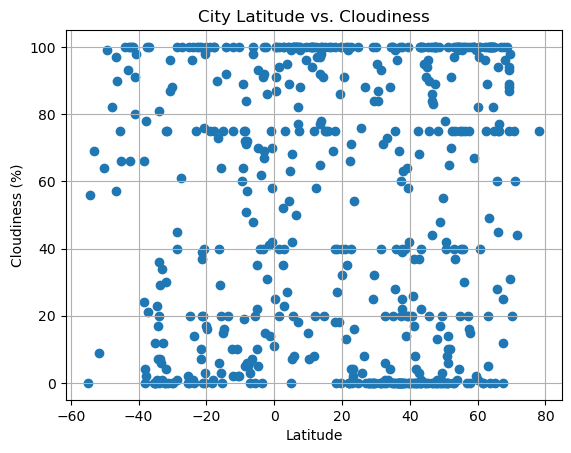

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

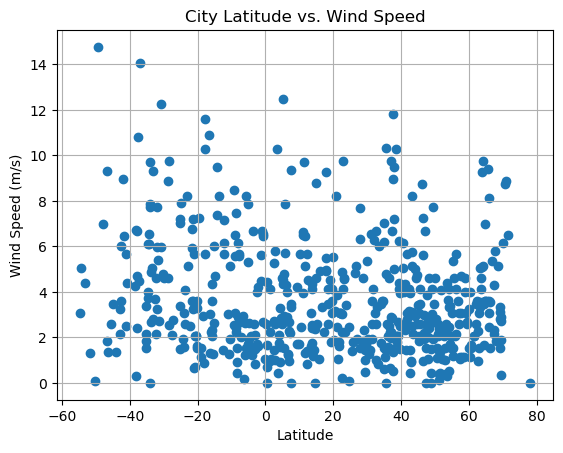

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,prince rupert,54.3161,-130.3201,12.05,98,100,4.12,CA,1693947619
1,ataq,14.5377,46.8319,29.02,43,91,2.39,YE,1693947853
2,arteche,12.2645,125.4048,25.37,88,100,1.39,PH,1693947853
4,bikenibeu village,1.3673,173.1241,30.98,70,20,4.12,KI,1693947853
6,ust-nera,64.5667,143.2000,5.58,69,82,1.66,RU,1693947853


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rocha,-34.4833,-54.3333,7.31,69,23,3.72,UY,1693947853
5,puerto natales,-51.7236,-72.4875,3.52,62,9,1.33,CL,1693947853
7,port-aux-francais,-49.3500,70.2167,2.63,78,99,14.77,TF,1693947854
8,tsiombe,-25.3000,45.4833,20.53,73,0,1.51,MG,1693947854
13,edinburgh of the seven seas,-37.0676,-12.3116,14.12,87,100,14.08,SH,1693947854


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
# Define a function to create Linear Regression plots
x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_n)
regress_values_n = x_values_n * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Define a function to create Linear Regression plots
x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


The r-value is: 0.7231361252788528


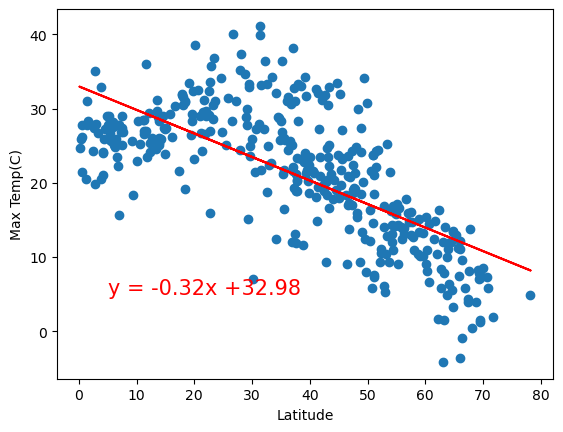

In [16]:
# Linear regression on Northern Hemisphere
x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df['Max Temp']

plt.scatter(x_values_n,y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.annotate(line_eq_n,(5,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.7231361252788528


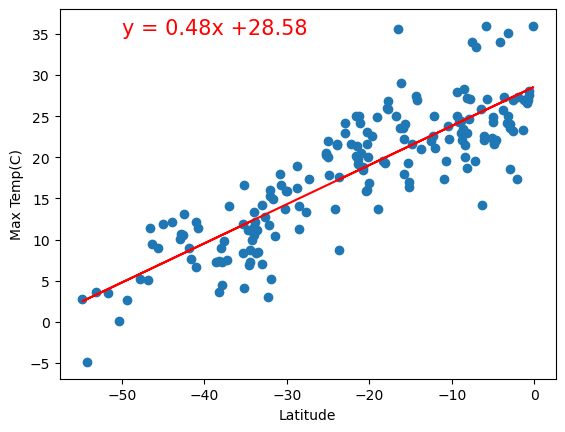

In [17]:
# Linear regression on Southern Hemisphere
x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_s,y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
plt.annotate(line_eq_s,(-50,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The provided data illustrates a strong negative linear relationship between latitude and maximum temperature in the northern hemisphere. As one moves further from the equator (increasing latitude), the maximum temperature tends to decrease.
    The data illustrates a strong positive linear relationship between latitude and maximum temperature in the southern hemisphere. As one moves closer to the equator from the southernmost point, the maximum temperature tends to rise.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0015697045777349253


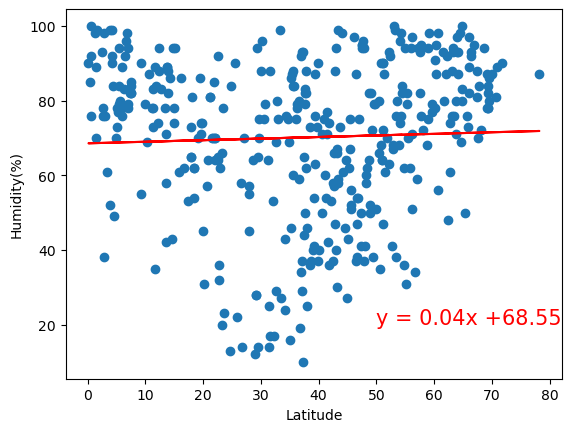

In [18]:
# Northern Hemisphere
x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_n)
regress_values_n = x_values_n * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_n,y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.annotate(line_eq_n,(50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.006655296990359856


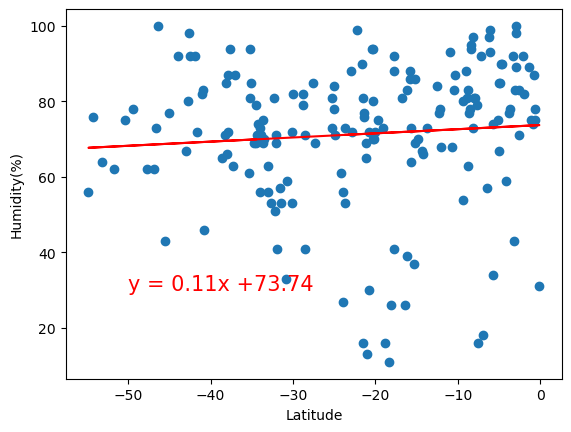

In [19]:
# Southern Hemisphere
x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_s,y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.annotate(line_eq_s,(-50,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and humidity in the northern hemisphere is very weak. This means the minor increase in humidity as one moves northward is not practically significant, given the very small slope and extremely low R2 value.
     There's a slight trend suggesting that humidity might increase as one moves closer to the equator in the southern hemisphere. However, the linear relationship's strength remains weak. This highlights that a majority of the variation in humidity in the southern hemisphere is influenced by factors other than just latitude, based on this dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0015970884329935928


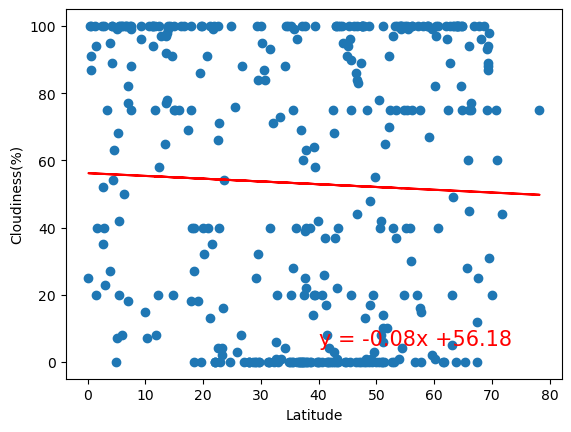

In [20]:
# Northern Hemisphere
x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_n)
regress_values_n = x_values_n * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_n,y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.annotate(line_eq_n,(40,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.002039346659706448


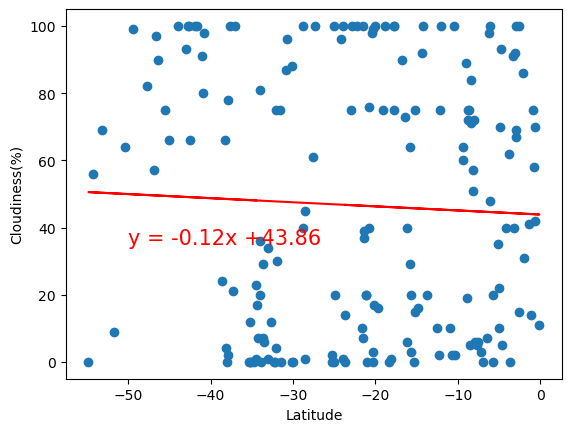

In [21]:
# Southern Hemisphere
x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_s,y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.annotate(line_eq_s,(-50,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The model indicates a very weak and likely not practically significant relationship between latitude and cloudiness in the northern hemisphere. 
    There's a minor trend indicating that cloudiness might decrease slightly as one moves closer to the equator in the southern hemisphere, the strength of this linear relationship is very weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00038632586465891405


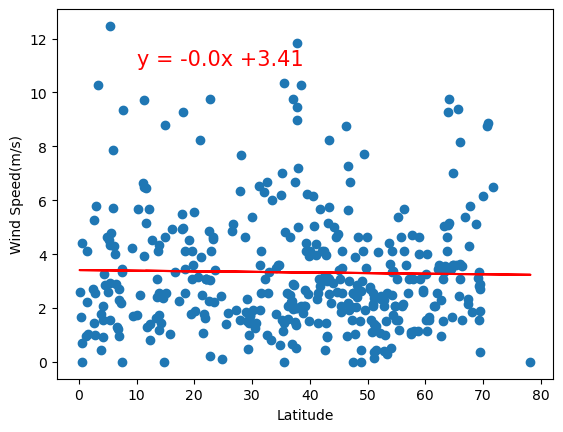

In [22]:
# Northern Hemisphere
x_values_n = northern_hemi_df['Lat']
y_values_n = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_n, y_values_n)
regress_values_n = x_values_n * slope + intercept
line_eq_n = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_n,y_values_n)
plt.plot(x_values_n,regress_values_n,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.annotate(line_eq_n,(10,11),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.03153770100626057


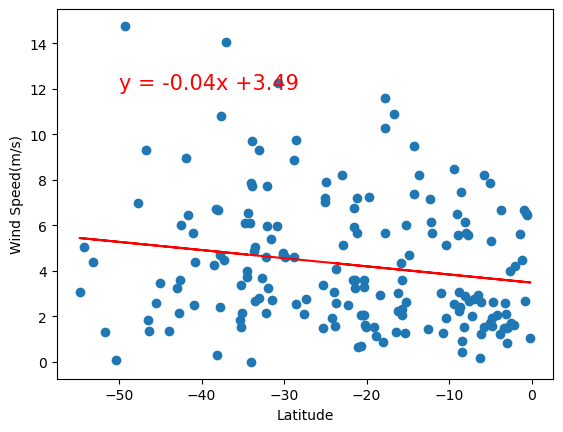

In [23]:
# Southern Hemisphere
x_values_s = southern_hemi_df['Lat']
y_values_s = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values_s,y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.annotate(line_eq_s,(-50,12),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The model suggests that there's no strong linear relationship between these variables for the northern hemisphere. The extremely low R2 value highlights that latitude is not a significant predictor of wind speed in the northern hemisphere based on this dataset.
    While the relationship is inverse (as shown by the negative slope for the Southern hemisphere), the magnitude of the slope is relatively small. This means that while there is a decrease in wind speed as we move away from the South Pole, the rate of decrease isn't drastic. In essence, latitude has a very subtle effect on wind speed based on this data and model.The low R*2 value (0.0315) would mean that this linear relationship only explains a small fraction of the variation in wind speed.  